In [71]:
import pandas_datareader as data
%matplotlib inline
import pandas as pd
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
df={'谷歌':'GOOG'}
start_data='2014-12-01'
end_data='2018-12-01'
GOOGDf=data.get_data_yahoo(df['谷歌'],start_data,end_data)
GOOGDf.to_csv("GOOG.csv",sep=' ')


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

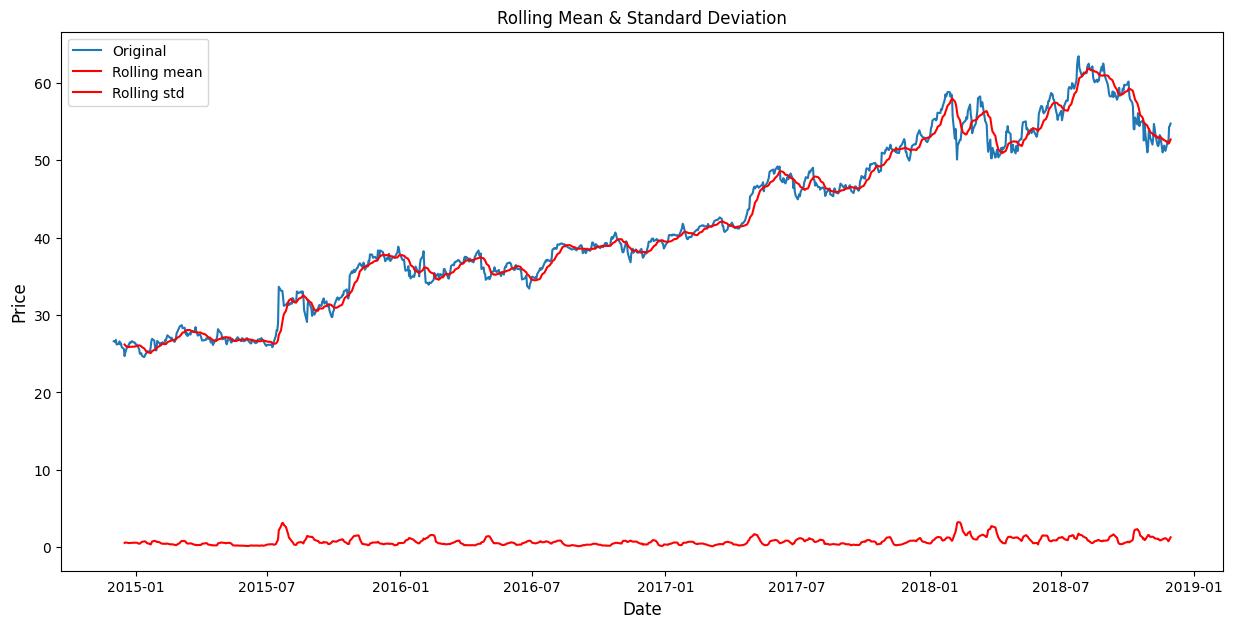

In [72]:
plt.figure(figsize=(15,7))
plt.plot(GOOGDf["Close"], label='Original')
plt.plot(GOOGDf["Close"].rolling(window=12).mean(),color='red', label='Rolling mean')
plt.plot(GOOGDf['Close'].rolling(window=12).std(), color='red', label='Rolling std')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')


In [74]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [76]:

def ADF_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
   
ADF_test(GOOGDf["Close"])
#Results indicate that the p-value is 0.699, meaning that it is very likely that the data is not stationary.

Results of Dickey-Fuller Test:
Test Statistic                  -1.139302
p-value                          0.699147
Lags Used                       11.000000
Number of Observations Used    997.000000
Critical Value (1%)             -3.436926
Critical Value (5%)             -2.864443
Critical Value (10%)            -2.568316
dtype: float64


In [4]:
GOOGDf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-01,26.996382,26.520189,26.871225,26.616922,42307838.0,26.616922
2014-12-02,26.701691,26.417471,26.602463,26.614429,30533600.0,26.614429
2014-12-03,26.726423,26.390545,26.499247,26.493263,25559983.0,26.493263
2014-12-04,26.793440,26.357136,26.485285,26.791943,27842232.0,26.791943
2014-12-05,26.571548,26.142227,26.477306,26.191092,51312493.0,26.191092


In [5]:
stock = GOOGDf.copy()
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-01,26.996382,26.520189,26.871225,26.616922,42307838.0,26.616922
2014-12-02,26.701691,26.417471,26.602463,26.614429,30533600.0,26.614429
2014-12-03,26.726423,26.390545,26.499247,26.493263,25559983.0,26.493263
2014-12-04,26.793440,26.357136,26.485285,26.791943,27842232.0,26.791943
2014-12-05,26.571548,26.142227,26.477306,26.191092,51312493.0,26.191092


In [6]:
# resample the date
stock_week = stock["Close"].resample('W-MON').mean()
stock_week.head()

Date
2014-12-01    26.616922
2014-12-08    26.473517
2014-12-15    26.130559
2014-12-22    25.456110
2014-12-29    26.473816
Freq: W-MON, Name: Close, dtype: float64

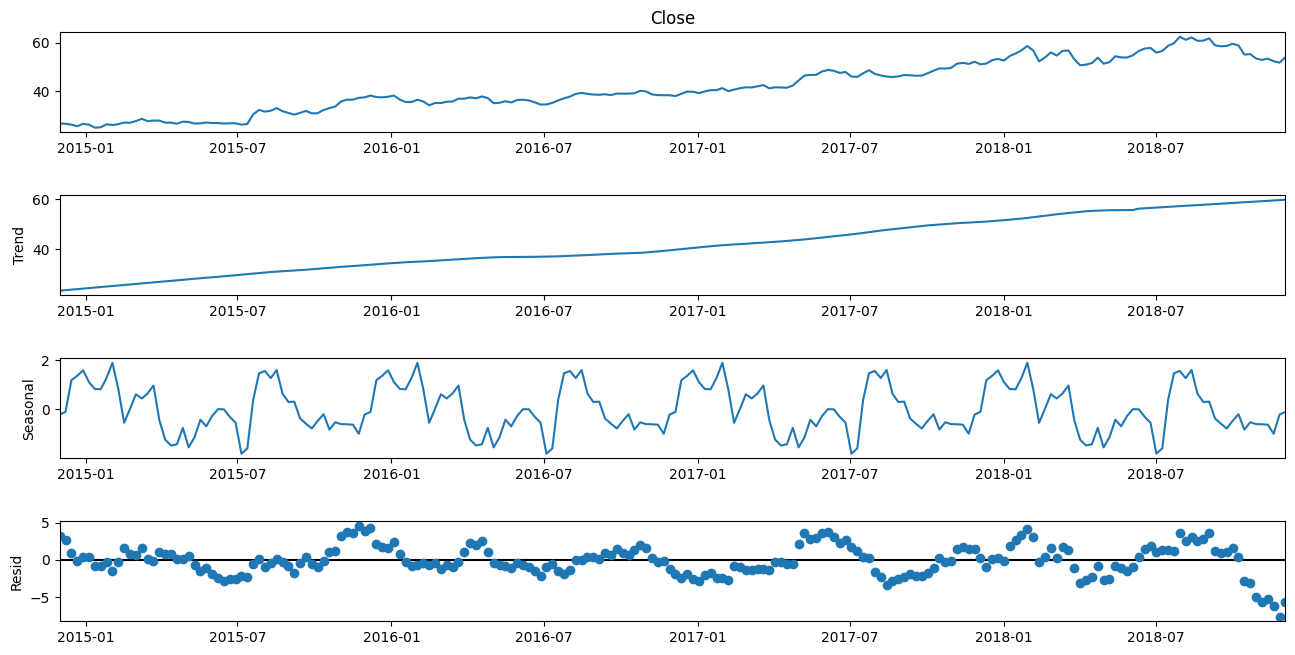

In [79]:

def seasonal_decompose (df):
    decomposition = sm.tsa.seasonal_decompose(df, model='additive', extrapolate_trend=12)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()
    
    return trend, seasonal, residual
 
trend, seasonal, residual = seasonal_decompose(stock_week)

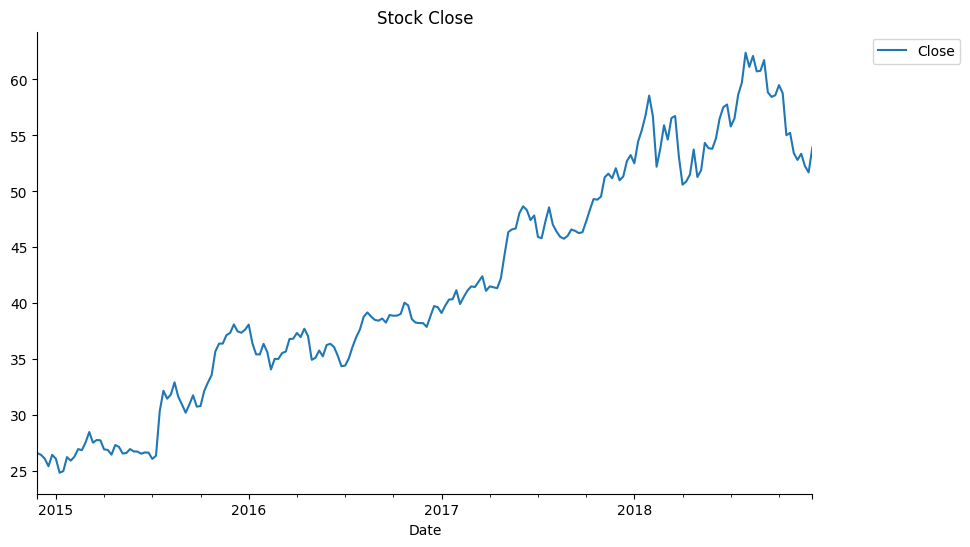

In [17]:
# plot the data
stock_train = stock_week['2014':'2018']
plt.figure(figsize=(10, 6))
stock_train.plot()
plt.legend(bbox_to_anchor=(1.2, 1))
plt.title('Stock Close')
sns.despine()


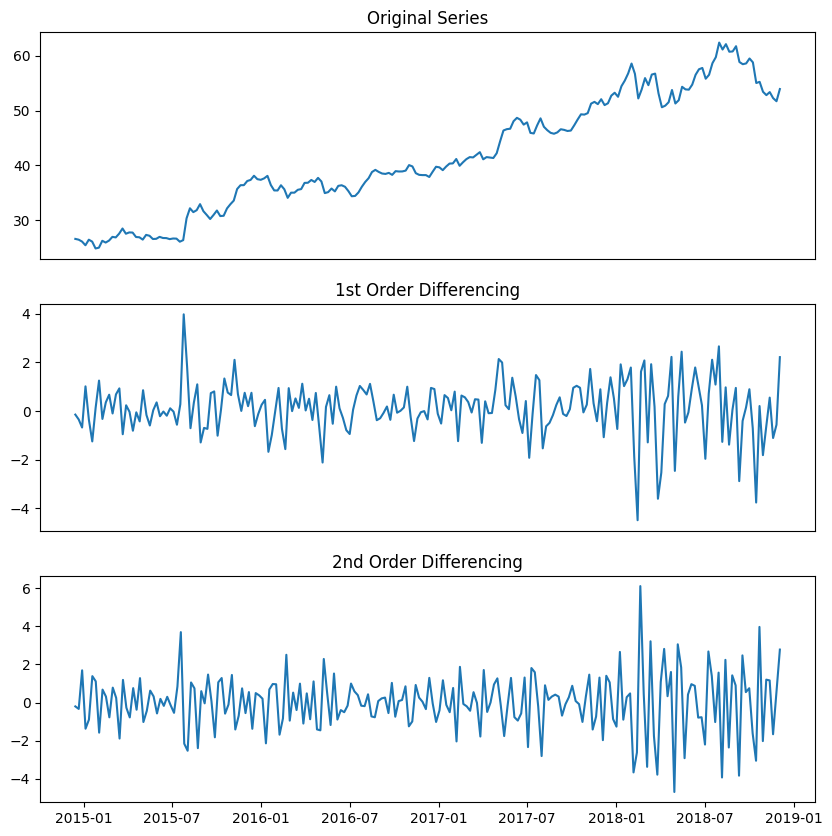

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
ax1.plot(stock_train)
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(stock_train.diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(stock_train.diff().diff())
ax3.set_title('2nd Order Differencing')
plt.show()

c:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partiel Autocorrelation for first-order differencing')

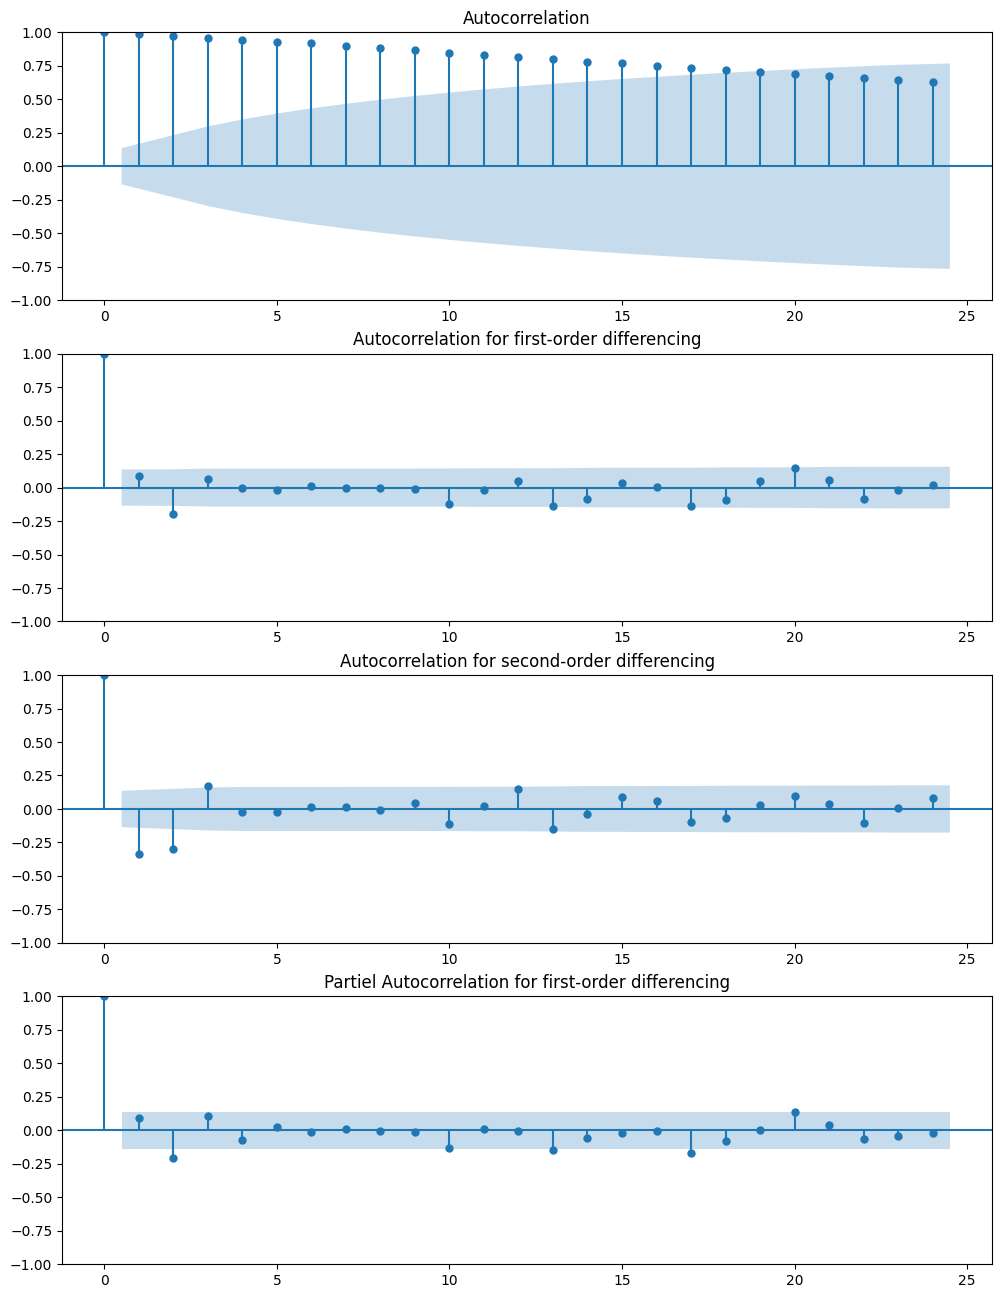

In [35]:
# caculate ACF and PACF

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
_ = plot_acf(stock_train, ax=ax1)
_ = plot_acf(stock_train.diff().dropna(), ax=ax2)
ax2.set_title('Autocorrelation for first-order differencing')
_ = plot_acf(stock_train.diff().diff().dropna(), ax=ax3)
ax3.set_title('Autocorrelation for second-order differencing')
_ = plot_pacf(stock_train.diff().dropna(), ax=ax4)
ax4.set_title('Partiel Autocorrelation for first-order differencing')

Here we can see that in second-order differencing the immediate lag has gone on the negative side, representing that in the second-order the series has become over the difference. Hence, we will select the first-order differencing.

In [24]:
import pmdarima as pm
ARIMA_model = pm.auto_arima(stock_train, m=12)
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -311.446
Date:                Thu, 03 Nov 2022   AIC                            630.891
Time:                        14:13:50   BIC                            644.261
Sample:                    12-01-2014   HQIC                           636.297
                         - 12-03-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1309      0.072      1.828      0.068      -0.009       0.271
ma.L1          0.1554      0.061      2.550      0.011       0.036       0.275
ma.L2         -0.2304      0.064     -3.621      0.000      -0.355      -0.106
sigma2         1.1523      0.089     12.968      0.000       0.978       1.326
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                34.73
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.89   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF')

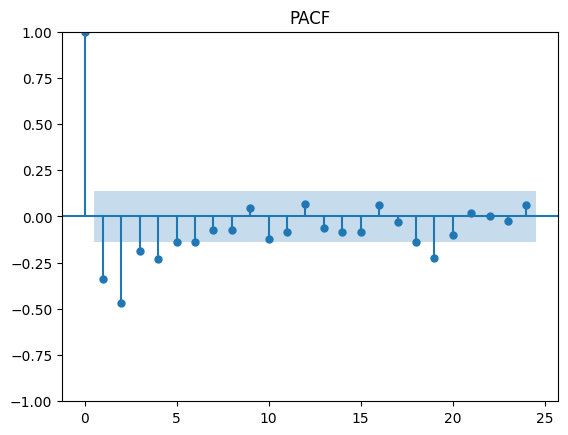

In [67]:
PACF = plot_pacf(stock_train.diff().diff().dropna())
plt.title("PACF")

In [62]:
stock_train.head()

Date
2014-12-01    26.616922
2014-12-08    26.473517
2014-12-15    26.130559
2014-12-22    25.456110
2014-12-29    26.473816
Freq: W-MON, Name: Close, dtype: float64

c:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(<AxesSubplot: title={'center': 'stock'}, xlabel='Date'>,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: title={'center': 'Partial Autocorrelation'}>)

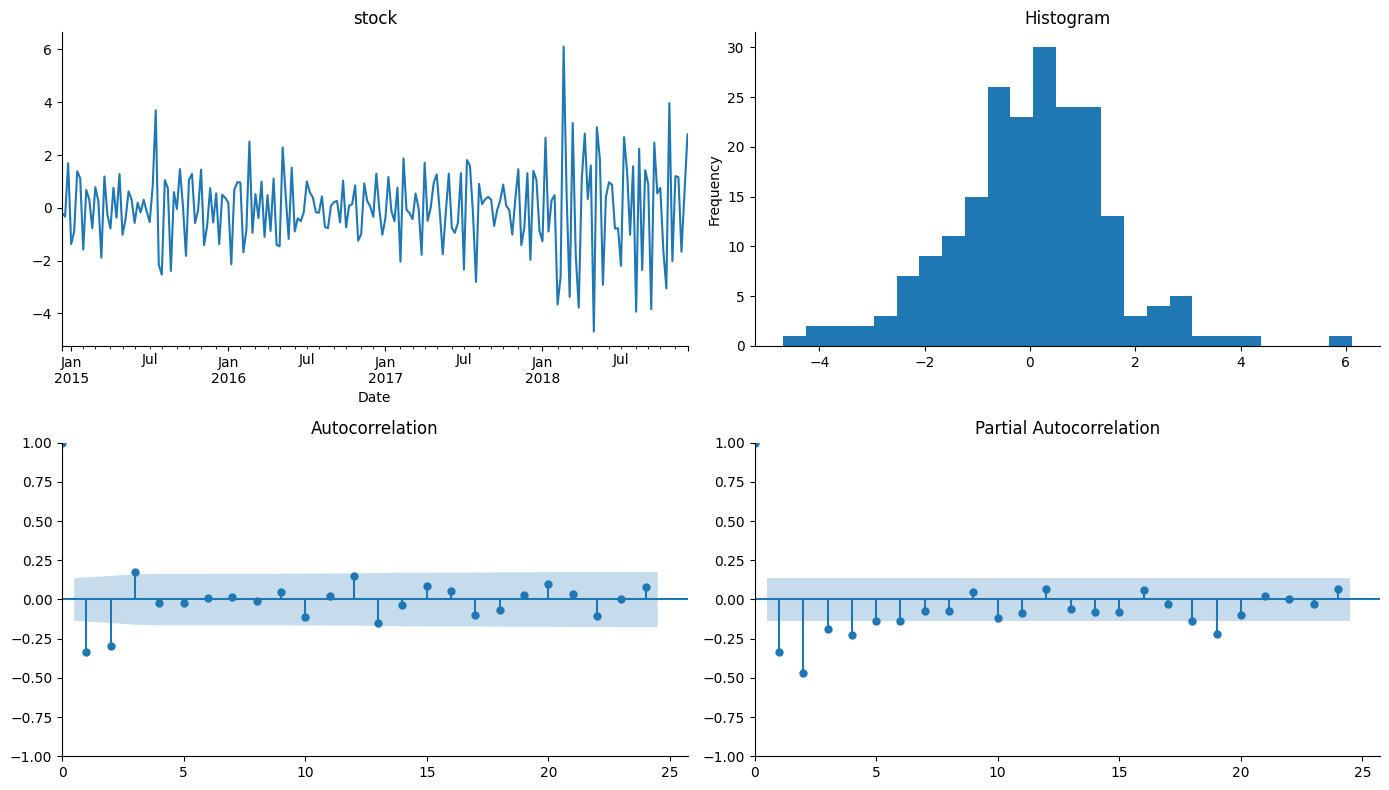

In [70]:
#在下图分别绘制原始数据的残差图、直方图、ACF图和PACF图
def tsplot(y,lags=None,title='',figsize=(14,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout,(0,0))
    hist_ax = plt.subplot2grid(layout,(0,1))
    acf_ax= plt.subplot2grid(layout,(1,0))
    pacf_ax = plt.subplot2grid(layout,(1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax,kind='hist',bins=25)
    hist_ax.set_title('Histogram')
    plot_acf(y,lags=lags,ax=acf_ax)
    plot_pacf(y,lags=lags,ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax,pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax,acf_ax,pacf_ax

tsplot(stock_train.diff().diff().dropna(),title='stock')

In [68]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(stock_train, order=(5, 2, 4), freq='W-MON')
model_fit = model.fit()
model_fit.summary()
pred = model_fit.predict(start='2018-01-01', end='2018-12-03', dynamic=True,typ='levels')
print(pred)

c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Date
2018-01-01    53.259679
2018-01-08    53.420181
2018-01-15    53.612827
2018-01-22    53.656454
2018-01-29    53.989064
2018-02-05    54.060278
2018-02-12    54.192245
2018-02-19    54.461439
2018-02-26    54.560749
2018-03-05    54.681574
2018-03-12    54.974352
2018-03-19    55.026367
2018-03-26    55.203868
2018-04-02    55.456389
2018-04-09    55.517600
2018-04-16    55.707832
2018-04-23    55.950761
2018-04-30    55.998703
2018-05-07    56.223134
2018-05-14    56.432098
2018-05-21    56.492032
2018-05-28    56.730091
2018-06-04    56.917084
2018-06-11    56.984154
2018-06-18    57.239287
2018-06-25    57.396960
2018-07-02    57.483043
2018-07-09    57.743139
2018-07-16    57.878547
2018-07-23    57.983278
2018-07-30    58.245453
2018-08-06    58.359156
2018-08-13    58.487300
2018-08-20    58.743448
2018-08-27    58.841788
2018-09-03    58.992538
2018-09-10    59.238708
2018-09-17    59.325795
2018-09-24    59.499335
2018-10-01    59.730496
2018-10-08    59.812510
2018-10-15 

c:\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


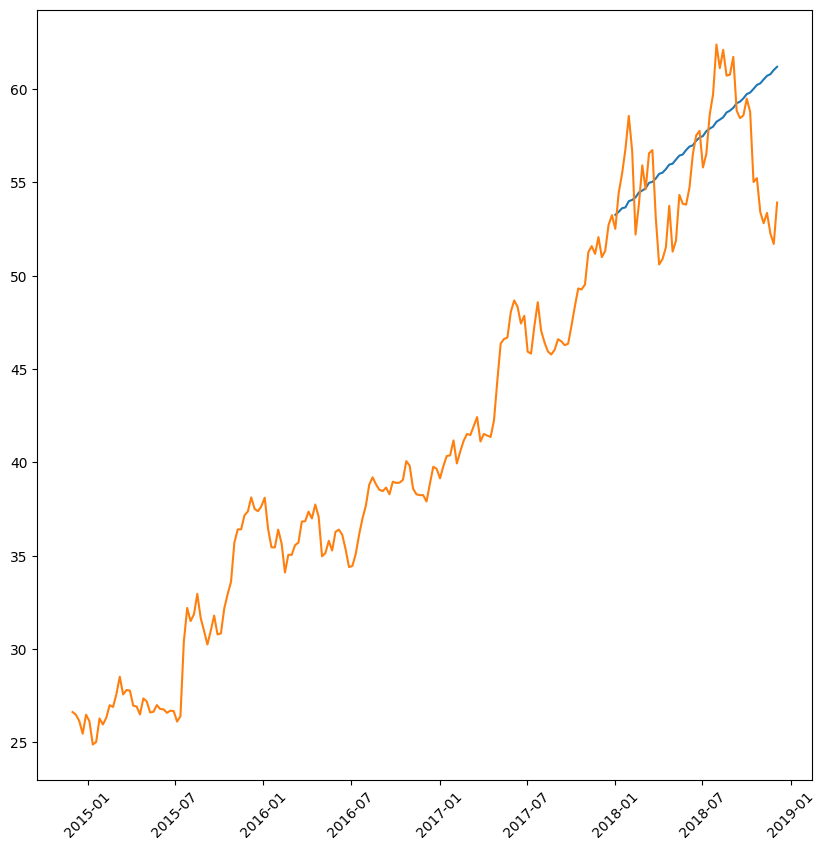

In [69]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)